In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
#loading bgr and gray scale versions
bgr = cv2.imread('images/green.png')
grey = cv2.imread('images/green.png',cv2.IMREAD_GRAYSCALE)

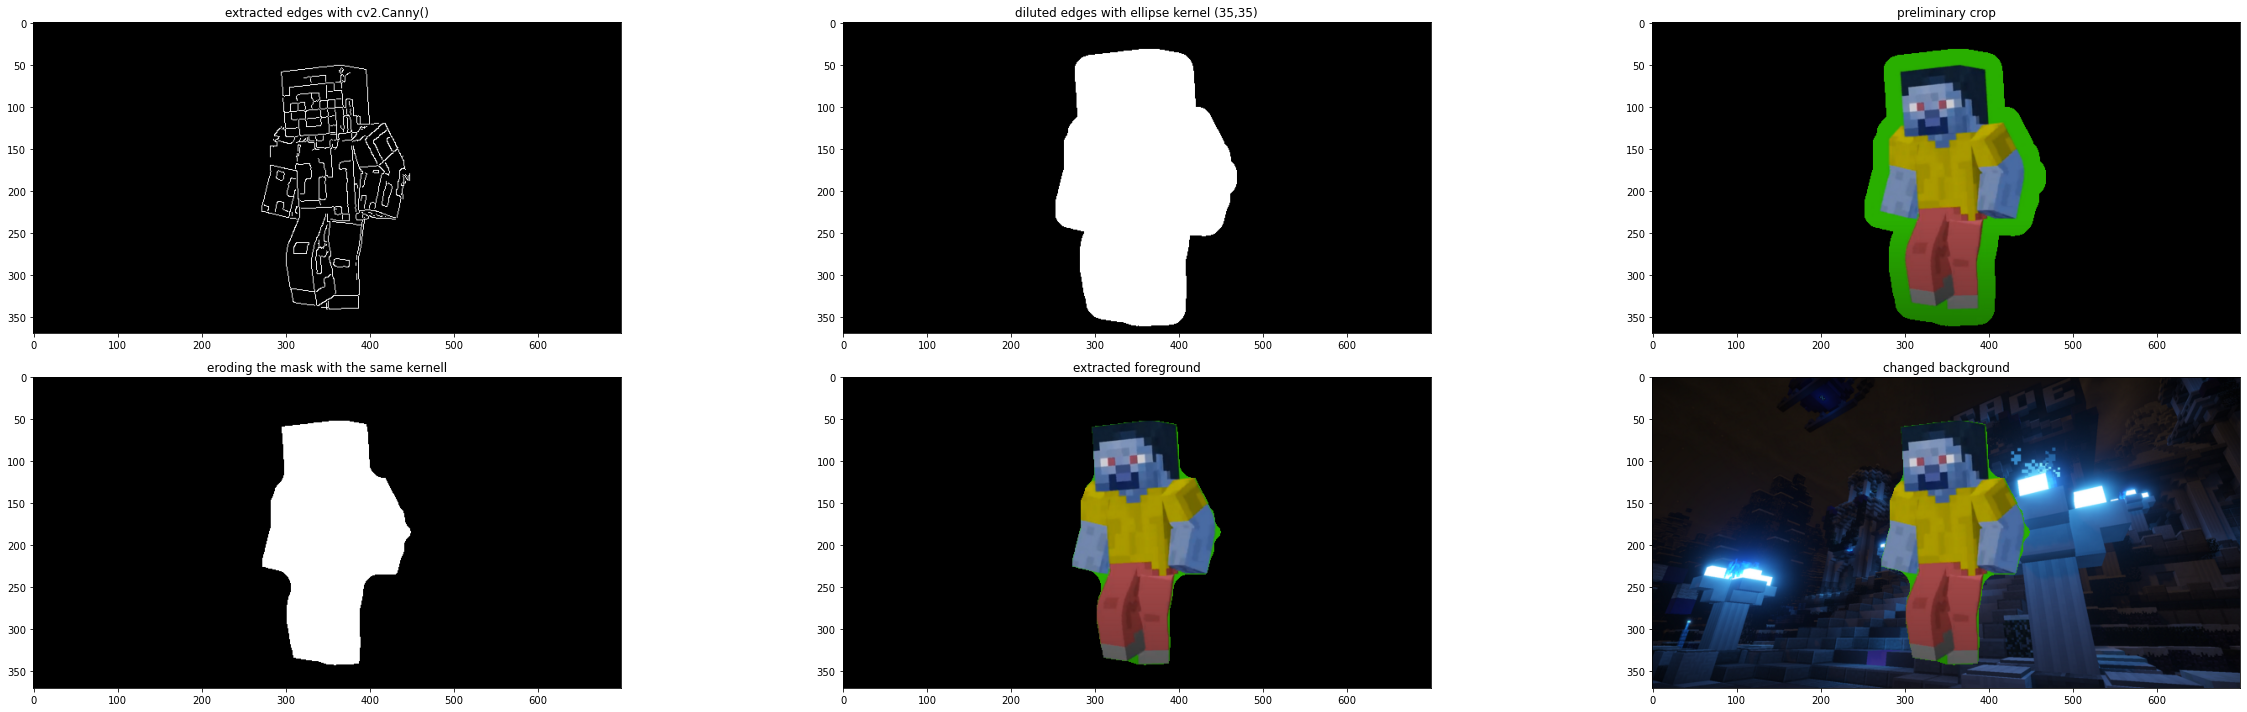

In [3]:
# to extract foreground we need mask
#we can extract edges of the image
edges = cv2.Canny(grey,0,34)
fig,ax = plt.subplots(2,3,figsize=(35,10))
ax[0,0].imshow(edges,cmap='gray')
ax[0,0].set_title('extracted edges with cv2.Canny()')
##using dilate we ca fill in the edges
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(40,40))
mask_dilated = cv2.dilate(edges,kernel)
ax[0,1].imshow(mask_dilated,cmap='gray')
ax[0,1].set_title('diluted edges with ellipse kernel (35,35)')
#preliminary foreground
pre_foreg = bgr.copy()
pre_foreg[mask_dilated==0] = 0
ax[0,2].imshow(pre_foreg,cmap='gray')
ax[0,2].set_title('preliminary crop')

#eroding the mask 
mask = cv2.erode(mask_dilated,kernel)
ax[1,0].imshow(mask,cmap='gray')
ax[1,0].set_title('eroding the mask with the same kernell')

#foreground extraction
foreg = bgr.copy()
foreg[mask==0] = 0
ax[1,1].imshow(foreg,cmap='gray')
ax[1,1].set_title('extracted foreground')

# background
back = cv2.imread('images/back.png')
#making it the same as our image
back = back[0:370,:,:]
back[mask==255] = 0
back = back + foreg
ax[1,2].imshow(back,cmap='gray')
ax[1,2].set_title('changed background')

plt.tight_layout()



Text(0.5, 1.0, 'merging foreground and background')

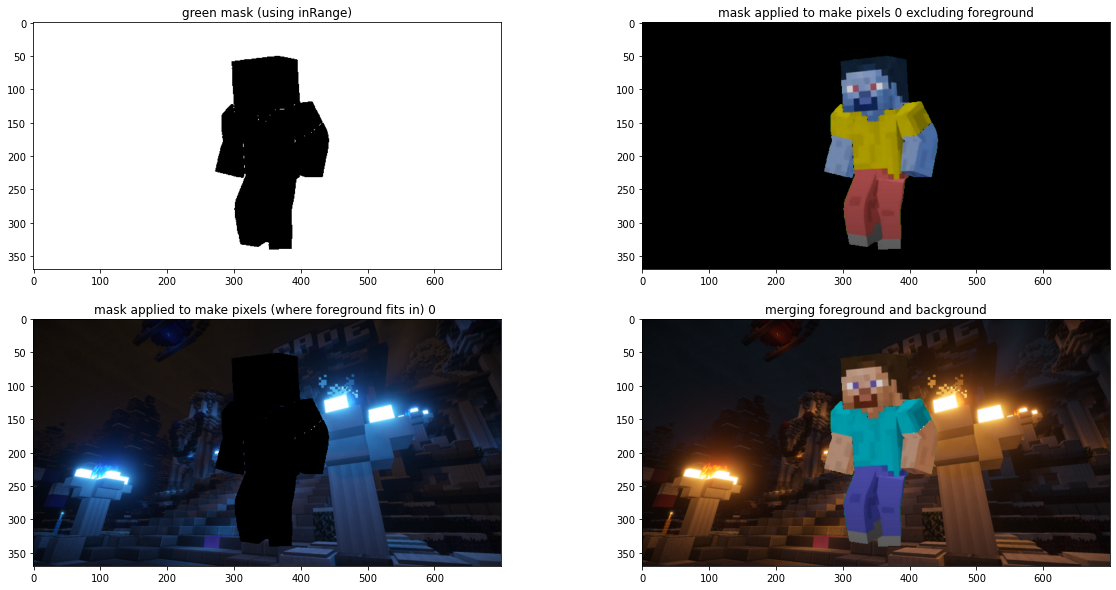

In [4]:
b = cv2.imread('images/back.png')
b = b[0:370,:,:]
fig,ax = plt.subplots(2,2,figsize=(20,10))
#hsv conversion
hsv = cv2.cvtColor(bgr,cv2.COLOR_BGR2HSV)
lower = (40,50,20)
upper = (80,255,255)
#using inrage extracting 
mask_new = cv2.inRange(hsv,lower,upper)
ax[0,0].imshow(mask_new,cmap='gray')
ax[0,0].set_title('green mask (using inRange)')
#masking the image
new_image = bgr.copy()
new_image[mask_new==255] = 0
ax[0,1].imshow(new_image,cmap='gray')
ax[0,1].set_title('mask applied to make pixels 0 excluding foreground')
#masking the background
b[mask_new==0] =0
ax[1,0].imshow(b)
ax[1,0].set_title('mask applied to make pixels (where foreground fits in) 0 ')

completed = new_image +b
completed = cv2.cvtColor(completed,cv2.COLOR_BGR2RGB)
ax[1,1].imshow(completed)
ax[1,1].set_title('merging foreground and background')
